# My py-pde tutorial

In [1]:
import numpy as np
print("Succesfully imported %s -- Version: %s"%(np.__name__,np.__version__))
import scipy
print("Succesfully imported %s -- Version: %s"%(scipy.__name__,scipy.__version__))
import matplotlib.pyplot as plt
print("Succesfully imported %s"%plt.__name__)
import pandas as pd
print("Succesfully imported %s -- Version: %s"%(pd.__name__,pd.__version__))
# from sympy import Function, dsolve, Eq, Derivative, symbols
import sympy as sp
from scipy import optimize
print("Succesfully imported %s"%optimize.__name__)
import numpy as np
from scipy.integrate import solve_ivp
print("Succesfully imported %s"%solve_ivp.__name__)

Succesfully imported numpy -- Version: 1.20.1
Succesfully imported scipy -- Version: 1.6.2
Succesfully imported matplotlib.pyplot
Succesfully imported pandas -- Version: 1.2.4
Succesfully imported scipy.optimize
Succesfully imported solve_ivp


## Section 1: My Introduction to py-pde
1. UnitGrid in 1 or more D: grid = UnitGrid([32, 32]); grid on the domain fromj 0 to 1; amplitude grid depending 
2. CartesianGrid in 1 or more D: grid = CartesianGrid([[-5, 5]], 64): grid on domain from -5 to 5; 
3. plot_kymograph(storage)  # visualize the result in a space-time plot 

##  Section 2: Solving Poisson’s equation in 1D using predefined Poisson 
Solves the Poisson with various boundary conditions. 

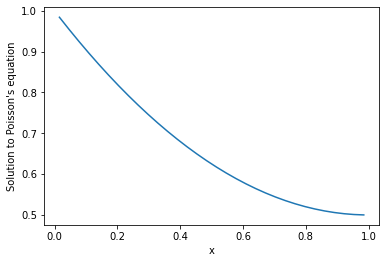

In [2]:
from pde import CartesianGrid, ScalarField, solve_poisson_equation

grid = CartesianGrid([[0, 1]], 32, periodic=False)
field = ScalarField(grid, 1)
result = solve_poisson_equation(field, bc=[{"value": 1}, {"derivative": 0}])

result.plot()

##  Section 3: Solving heat equation in 1D using Diffusion PDE  
Solves the Poisson with various boundary conditions. 

  0%|          | 0/10.0 [00:00<?, ?it/s]

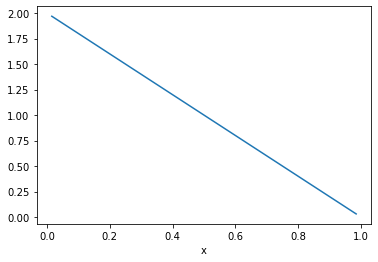

In [3]:
from pde import DiffusionPDE, ScalarField, UnitGrid

grid = UnitGrid(64)  # generate grid

grid = CartesianGrid([[0, 1]], 32, periodic=False)
field = ScalarField(grid, 1)

state = ScalarField.random_uniform(grid, 0.2)  # generate initial condition

eq = DiffusionPDE(diffusivity=1,bc = [{"value": 2}, {"value": 0}])  # define the pde

result = eq.solve(field, t_range=10)
result.plot()

  0%|          | 0/10.0 [00:00<?, ?it/s]

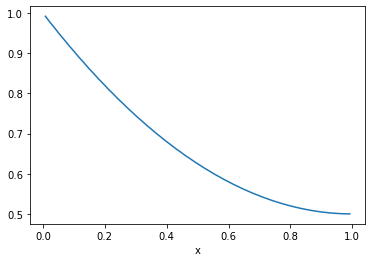

In [4]:
from pde import PDE, CartesianGrid, MemoryStorage, ScalarField, plot_kymograph

grid = CartesianGrid([[0, 1]], [64])  # generate grid
field = ScalarField(grid, 1)
#state = ScalarField(grid)  # generate initial condition

#eq = PDE({"c": "d_dxx(c)-1"}, bc=[{"value": 1}, {"derivative": 0}])
eq = PDE({"c": "laplace(c)-1"}, bc=[{"value": 1}, {"derivative": 0}])

storage = MemoryStorage()
result = eq.solve(field, t_range=10)

# plot the trajectory as a space-time plot
result.plot()

## Section 4: 2D Stationary Diffusion

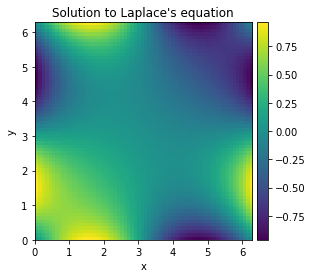

In [5]:
from pde import CartesianGrid, solve_laplace_equation

grid = CartesianGrid([[0, 2 * np.pi]] * 2, 64)
bcs = [{"value": "sin(y)"}, {"value": "sin(x)"}]

storage = MemoryStorage()
result = solve_laplace_equation(grid, bcs)
result.plot()

## Section 5: Single Component Brusselator in 1D

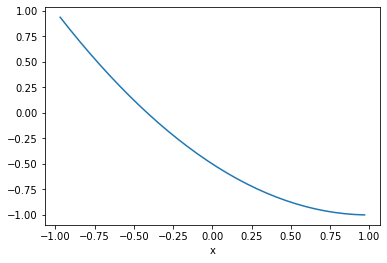

In [6]:
from pde import PDE, CartesianGrid, MemoryStorage, ScalarField, plot_kymograph

# Expanded definition of the PDE
eq = PDE(
    {
        "u": f"laplace(u) - 1",
    },  bc=[{"value": 1}, {"derivative": 0}]
)


grid = CartesianGrid([[-1, 1]], 32)  # generate grid
field = ScalarField(grid, 1)  # generate initial condition

storage = MemoryStorage()  # store intermediate information of the simulation
res = eq.solve(field, 100, dt=1e-3, tracker=storage.tracker(1))  # solve the PDE

res.plot()

CartesianGrid(bounds=((-1.0, 1.0),), shape=(32,), periodic=[False])


  0%|          | 0/0.5 [00:00<?, ?it/s]

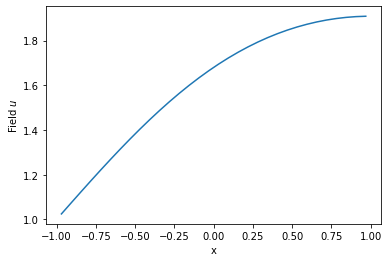

In [7]:
from pde import PDE, FieldCollection, PlotTracker, ScalarField, UnitGrid

# define the PDE
a = 2
d0 = 1
eq = PDE(
    {
        "u": f"laplace(u)",
    },  bc=[{"value": 1}, {"derivative": 0}]
)

# initialize state
grid = UnitGrid([32])
grid = CartesianGrid([[-1, 1]], 32, periodic=False)
print(grid)
#field = ScalarField(grid, 1)
field = ScalarField(grid, a, label="Field $u$")
#state = FieldCollection([u])
# simulate the pde
result = eq.solve(field, t_range=0.5, dt=1e-3)
result.plot()

## Section 6: Single Component Brusselator in 2D

  0%|          | 0/20.0 [00:00<?, ?it/s]

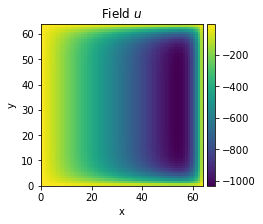

In [8]:
from pde import PDE, FieldCollection, PlotTracker, ScalarField, UnitGrid

# define the PDE
a = 0 
d0 = 1
eq = PDE(
    {
        "u": f"laplace(u) - x"
    },  bc={"value": 0}
)

bc_x_left = {"value": 1}
bc_x_right = {"derivative": 0}
bc_x = [bc_x_left, bc_x_right]

# initialize state
grid = UnitGrid([64, 64])
u = ScalarField(grid, a, label="Field $u$")
state = FieldCollection([u])

# simulate the pde
result = eq.solve(state, t_range=20, dt=1e-3)
result.plot()

## Section 7: Brusselator in 2D with Tracker Removed
How are boundary conditions specified? 

  0%|          | 0/200.0 [00:00<?, ?it/s]

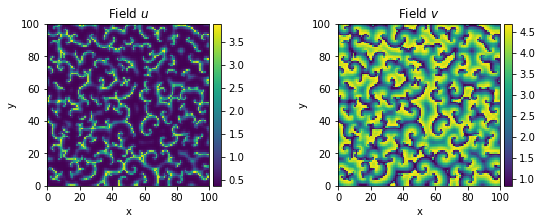

In [5]:
from pde import PDE, FieldCollection, PlotTracker, ScalarField, UnitGrid

# define the PDE
a, b = 1, 3
#a, b = 1, 1.7 
d0, d1 = 0.1, 0.01
eq = PDE(
    {
        "u": f"{d0} * laplace(u) + {a} - ({b} + 1) * u + u**2 * v",
        "v": f"{d1} * laplace(v) + {b} * u - u**2 * v",
    }
)

# initialize state
grid = UnitGrid([100, 100])
u = ScalarField(grid, a, label="Field $u$")
v = b / a + 0.1 * ScalarField.random_normal(grid, label="Field $v$")
#v = ScalarField(grid, b/a, label="Field $u$")
state = FieldCollection([u, v])

# simulate the pde
result = eq.solve(state, t_range=200, dt=1e-3)
result.plot()